In [5]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

import numpy as np

In [6]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [7]:
X_train = X_train / 255
X_test = X_test / 255

In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2816 - accuracy: 0.9198
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1275 - accuracy: 0.9628
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0902 - accuracy: 0.9731
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0681 - accuracy: 0.9793
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0532 - accuracy: 0.9835
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0419 - accuracy: 0.9873
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0343 - accuracy: 0.9893
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0278 - accuracy: 0.9914
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0238 - accuracy: 0.9928
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.018

In [9]:
model.evaluate(X_test,y_test)


313/313 [==============================] - 1s 1ms/step - loss: 0.0857 - accuracy: 0.9771


[0.08568717539310455, 0.9771000146865845]

In [11]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [12]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 971,    0,    1,    1,    0,    0,    4,    1,    1,    1],
       [   0, 1131,    0,    1,    0,    0,    1,    0,    2,    0],
       [   5,    2, 1008,    2,    3,    0,    2,    6,    4,    0],
       [   0,    1,    8,  983,    0,    6,    0,    1,    0,   11],
       [   0,    0,    5,    0,  965,    1,    1,    2,    0,    8],
       [   3,    0,    0,    7,    2,  867,    8,    1,    2,    2],
       [   3,    4,    1,    1,    6,    1,  941,    0,    1,    0],
       [   0,    5,   10,    1,    1,    0,    0, 1002,    3,    6],
       [   9,    1,    2,    2,   10,    5,    4,    3,  935,    3],
       [   1,    4,    0,    4,   17,    3,    1,    7,    4,  968]])>

Text(69.0, 0.5, 'Reality')

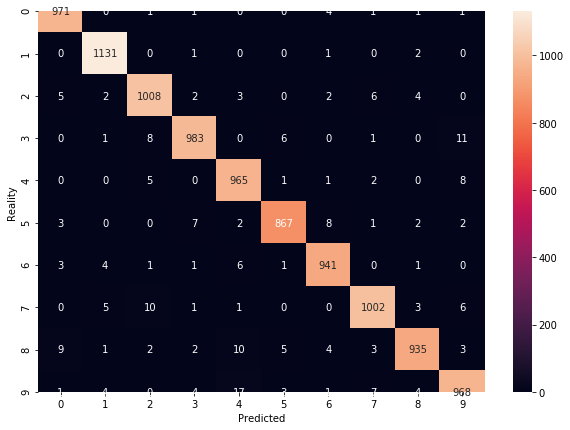

In [13]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Reality')